### 1️⃣ Introduction — K-Means Clustering 🔍

**K-Means** is an **unsupervised learning algorithm** used to group data points into **K clusters** based on similarity.  

- **Goal:** minimize intra-cluster variance (points in the same cluster are close to each other).  
- **Type:** Partition-based clustering.  
- **Applications:** customer segmentation, image compression, anomaly detection, market analysis.

Key characteristics:
- Iterative algorithm.  
- Requires specifying the number of clusters $K$.  
- Sensitive to initial centroid placement and scale of features.


### 2️⃣ Objective Function & Math ✏️

K-Means minimizes the **sum of squared distances** between data points and their assigned cluster centroids:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

Where:
- $C_k$ = cluster $k$  
- $x_i$ = data point  
- $\mu_k$ = centroid of cluster $C_k$

**Steps (mathematical form):**

1. Assign each point to nearest centroid:

$$
\text{Cluster}(x_i) = \arg\min_{k} \|x_i - \mu_k\|^2
$$

2. Update centroid for each cluster:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

3. Repeat steps 1 & 2 until centroids converge or maximum iterations reached.


### 3️⃣ Step-by-Step Algorithm 🧩

1. **Initialization:** randomly select $K$ points as initial centroids.  
2. **Assignment:** assign each data point to the nearest centroid.  
3. **Update:** recompute centroids as the mean of points assigned to each cluster.  
4. **Convergence check:** repeat steps 2–3 until centroids do not change significantly or maximum iterations reached.  

**Key Notes:**

- Sensitive to **feature scaling** → standardize features before clustering.  
- Use **Elbow Method** or **Silhouette Score** to select optimal $K$.  
- Works well for **spherical, equally sized clusters**.


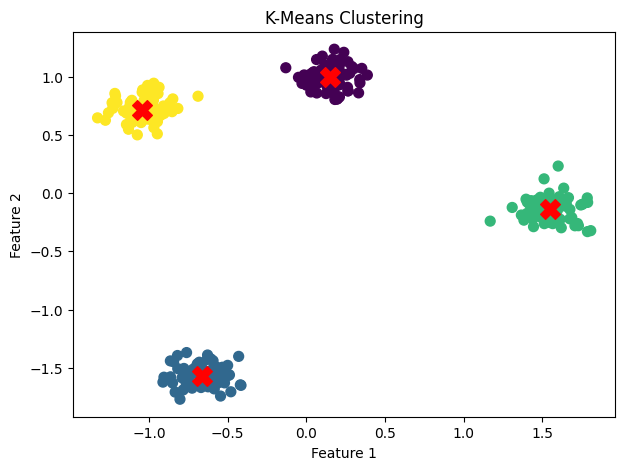

In [2]:
### 4️⃣ K-Means Implementation with scikit-learn 🧪

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 5️⃣ Elbow Method — Finding Optimal K 🔑

- **Idea:** plot total within-cluster sum of squares (WCSS) vs number of clusters.  
- Look for **“elbow” point** where adding more clusters doesn’t significantly reduce WCSS.

$$
\text{WCSS} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$


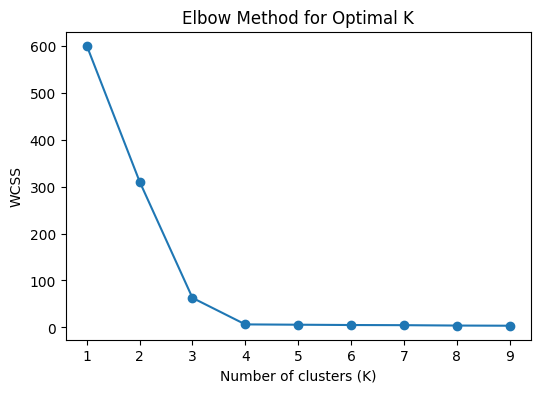

In [3]:
### 6️⃣ Elbow Method Visualization
wcss = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)  # inertia_ = WCSS

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


### 7️⃣ Silhouette Score — Cluster Quality 🌟

- Measures how well points are assigned to clusters:  

$$
s = \frac{b - a}{\max(a, b)}
$$

Where:  
- $a$ = average intra-cluster distance  
- $b$ = average nearest-cluster distance

- Score range: **-1 to 1**  
  - 1 → points well-clustered  
  - 0 → overlapping clusters  
  - Negative → points assigned to wrong cluster


In [4]:
### 8️⃣ Silhouette Score Example
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", score)


Silhouette Score: 0.879591338894901


### 9️⃣ K-Means from Scratch — Step-by-Step 🛠️

**Algorithm Implementation Steps:**

1. Initialize $K$ centroids randomly.  
2. Assign each point to nearest centroid using Euclidean distance.  
3. Update centroids as mean of assigned points.  
4. Repeat until centroids converge.

**Equation recap:**

$$
\text{Cluster assignment: } \arg\min_k \| x_i - \mu_k \|^2
$$

$$
\text{Centroid update: } \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$


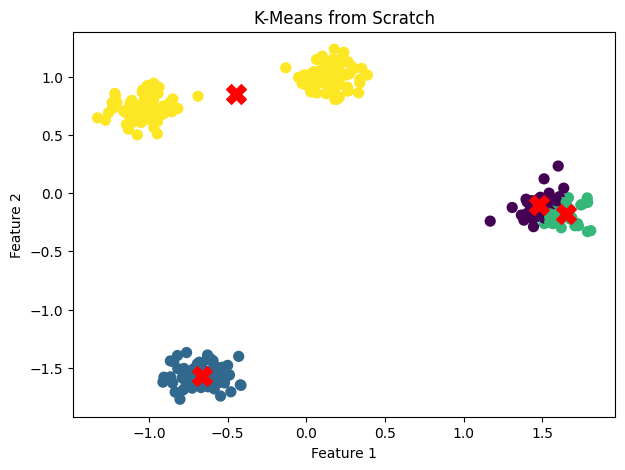

In [5]:
### 10️⃣ K-Means from Scratch Implementation
class KMeansScratch:
    def __init__(self, n_clusters=4, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        # Initialize centroids randomly
        random_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_idx]
        
        for i in range(self.max_iter):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            # Update centroids
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Test scratch implementation
km_scratch = KMeansScratch(n_clusters=4)
km_scratch.fit(X_scaled)
y_scratch = km_scratch.predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_scratch, cmap='viridis', s=50)
plt.scatter(km_scratch.centroids[:,0], km_scratch.centroids[:,1], s=200, c='red', marker='X')
plt.title('K-Means from Scratch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 1️⃣1️⃣ When to Use K-Means ✅

- **Dataset:** numeric features, moderate size, spherical clusters.  
- **Goal:** partition points into meaningful groups.  
- **Limitations:**  
  - Sensitive to outliers and feature scaling.  
  - Assumes clusters are roughly equally sized and spherical.  
  - Must predefine number of clusters $K$.  
- **Advantages:**  
  - Simple, fast, easy to implement.  
  - Good baseline for clustering tasks.

**Tips:**  
- Always standardize or normalize features.  
- Use **Elbow Method** or **Silhouette Score** for choosing K.  
- Initialize centroids multiple times (`n_init`) to avoid poor local minima.
